### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [14]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

In [15]:
print(len(data.index))
data_unique=data.drop_duplicates()
print(len(data_unique))

20358
19779


In [16]:
import numpy as np
data2=data_unique.drop("gravatar_id",axis=1)
print("有缺失值的列:")
for i in data2.columns:
    if np.any(data2[i].isna()):
        print(i)

有缺失值的列:
name
company
blog
location
email
hireable
bio
twitter_username


In [17]:
pd.set_option('future.no_silent_downcasting', True)
data2.fillna({'name':'','company':'','blog':'','location':'','email':'','hireable':False,'bio':'','twitter_username':''},inplace=True)
for i in data2.columns:
    if np.any(data2[i].isna()):
        print(i)
else:
    print('无有缺失值的列')

无有缺失值的列


In [18]:
import time
data2['created_at']=data2['created_at'].apply(lambda x:time.mktime(time.strptime(x,"%Y-%m-%dT%H:%M:%SZ")))
data2['updated_at']=data2['updated_at'].apply(lambda x:time.mktime(time.strptime(x,"%Y-%m-%dT%H:%M:%SZ")))
print(data2[['created_at','updated_at']])

         created_at    updated_at
0      1.317029e+09  1.697167e+09
1      1.435544e+09  1.696631e+09
2      1.219998e+09  1.696184e+09
3      1.400583e+09  1.697086e+09
4      1.345098e+09  1.696565e+09
...             ...           ...
20344  1.404315e+09  1.692089e+09
20345  1.512569e+09  1.690368e+09
20346  1.447483e+09  1.661260e+09
20347  1.637665e+09  1.696604e+09
20348  1.461334e+09  1.657195e+09

[19779 rows x 2 columns]


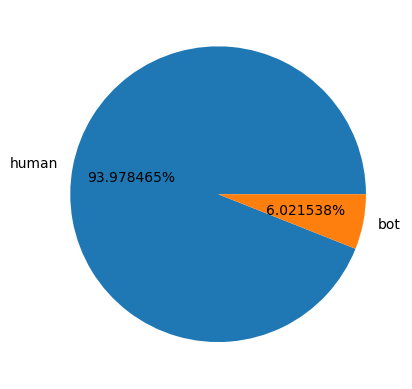

饼图更直观比较两者的数量
人类远多于机器人


In [19]:
import matplotlib.pyplot as plt
human=data2[data2['label']=='Human']
bot=data2[data2['label']=='Bot']
plt.pie([len(human),len(bot)],labels=['human','bot'],autopct='%f%%')
plt.show()
print("饼图更直观比较两者的数量")
print("人类远多于机器人")

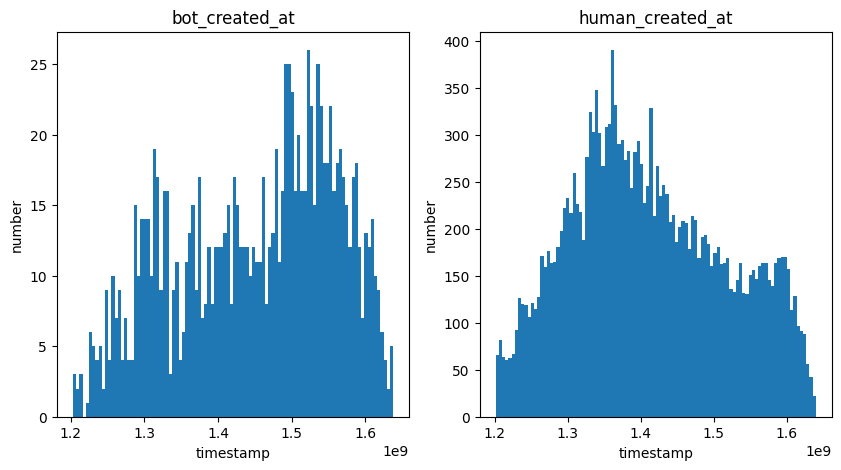

直方图能展示不同时间段的账户创建次数
机器人账户从2008开始逐年增长，且在2018年左右创建次数达到最多，在此之后逐渐减少。
人类账户从2008开始逐年增长，且在2012年左右创建次数达到最多，在此之后逐渐减少。


In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('bot_created_at')
plt.hist(bot['created_at'],bins=100)
plt.xlabel('timestamp')
plt.ylabel('number')
plt.subplot(1,2,2)
plt.title('human_created_at')
plt.hist(human['created_at'],bins=100)
plt.xlabel('timestamp')
plt.ylabel('number')
plt.show()
print("直方图能展示不同时间段的账户创建次数")
print(f"机器人账户从{time.localtime(1.2e9).tm_year}开始逐年增长，且在{time.localtime(1.52e9).tm_year}年左右创建次数达到最多，在此之后逐渐减少。")
print(f"人类账户从{time.localtime(1.2e9).tm_year}开始逐年增长，且在{time.localtime(1.35e9).tm_year}年左右创建次数达到最多，在此之后逐渐减少。")

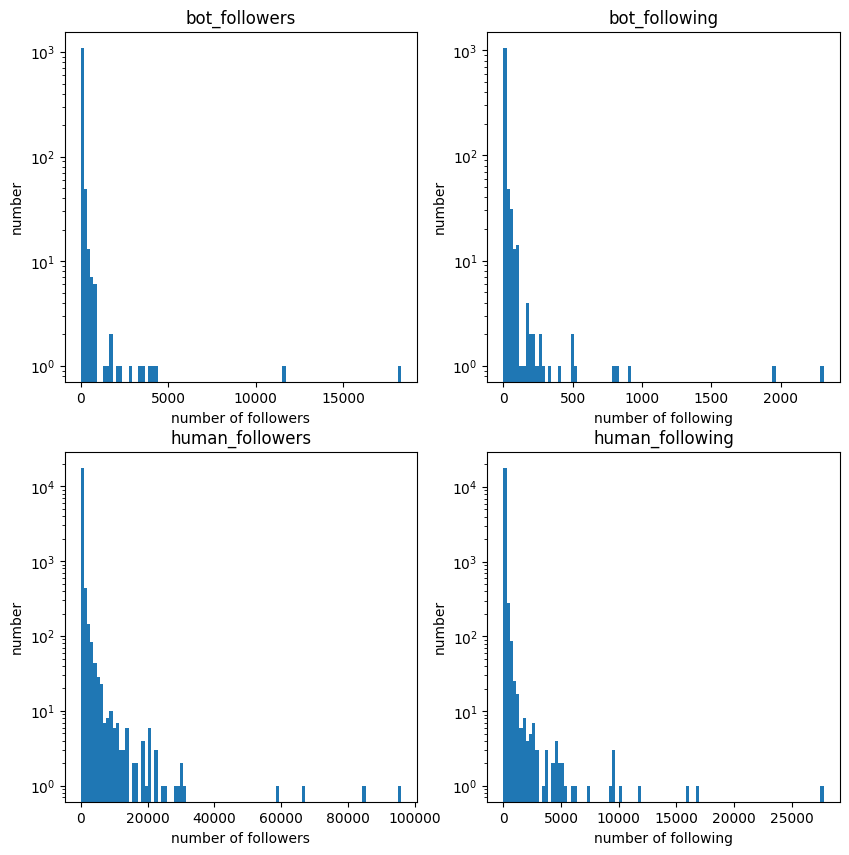

直方图能展示不同粉丝数或不同关注数的账号数量
机器人账户和人类账户一样，极大多数账户没用或有一些关注数和粉丝数，个别账户有大量关注和粉丝数。
人类账户拥有的粉丝数和关注数远多于机器人账户，


In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('bot_followers')
plt.hist(bot['followers'],bins=100)
plt.xlabel('number of followers')
plt.ylabel('number')
plt.yscale('log')
plt.subplot(2,2,2)
plt.title('bot_following')
plt.hist(bot['following'],bins=100)
plt.xlabel('number of following')
plt.ylabel('number')
plt.yscale('log')
plt.subplot(2,2,3)
plt.title('human_followers')
plt.hist(human['followers'],bins=100)
plt.xlabel('number of followers')
plt.ylabel('number')
plt.yscale('log')
plt.subplot(2,2,4)
plt.title('human_following')
plt.hist(human['following'],bins=100)
plt.xlabel('number of following')
plt.ylabel('number')
plt.yscale('log')
plt.show()
print("直方图能展示不同粉丝数或不同关注数的账号数量")
print("机器人账户和人类账户一样，极大多数账户没用或有一些关注数和粉丝数，个别账户有大量关注和粉丝数。")
print("人类账户拥有的粉丝数和关注数远多于机器人账户，")